In [1]:
#Importamos las libreias pandas, numpy y matplolib respectivamente 
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns 

In [3]:
#Carga desde un archivo .xlsx sin indice 
df= pd.read_csv('pais Entire home_apt.csv')
df

id                                       listing_url  \
0     9.794500e+04                https://www.airbnb.com/rooms/97945   
1     1.146950e+05               https://www.airbnb.com/rooms/114695   
2     1.273830e+05               https://www.airbnb.com/rooms/127383   
3     1.596340e+05               https://www.airbnb.com/rooms/159634   
4     1.895510e+05               https://www.airbnb.com/rooms/189551   
...            ...                                               ...   
5326  1.252060e+18  https://www.airbnb.com/rooms/1252057653491311158   
5327  1.252060e+18  https://www.airbnb.com/rooms/1252064707297002188   
5328  1.252170e+18  https://www.airbnb.com/rooms/1252167796711587864   
5329  1.252200e+18  https://www.airbnb.com/rooms/1252204445878776998   
5330  1.252240e+18  https://www.airbnb.com/rooms/1252243902096578406   

      host_since            host_response_time host_response_rate  \
0     18/04/2011            a few days or more                 0%   
1     12/05/2011                within an hour               100%   
2     26/05/2011                within an hour               100%   
3     01/07/2011                within an hour               100%   
4     03/08/2011                within an hour               100%   
...          ...                           ...                ...   
5326  29/07/2015  Estado de manera desconocida                 0%   
5327  23/09/2024  Estado de manera desconocida                 0%   
5328  20/05/2015  Estado de manera desconocida               100%   
5329  05/07/2013  Estado de manera desconocida               100%   
5330  23/09/2024  Estado de manera desconocida               100%   

     host_acceptance_rate host_is_superhost                host_verifications  \
0                      6%                 f                ['email', 'phone']   
1                     99%                 t                ['email', 'phone']   
2                     92%                 f  ['email', 'phone', 'work_email']   
3                     78%                 f                ['email', 'phone']   
4                     99%                 t                         ['phone']   
...                   ...               ...                               ...   
5326                  89%                 f  ['email', 'phone', 'work_email']   
5327                 100%                 f                ['email', 'phone']   
5328                 100%                 f  ['email', 'phone', 'work_email']   
5329                 100%                 f                ['email', 'phone']   
5330                 100%                 f                ['email', 'phone']   

            neighbourhood_cleansed       property_type  ...  \
0                           Hadern  Entire rental unit  ...   
1                     Berg am Laim  Entire rental unit  ...   
2                      Maxvorstadt  Entire rental unit  ...   
3               Pasing-Obermenzing  Entire rental unit  ...   
4                 Schwanthalerhöhe         Entire loft  ...   
...                            ...                 ...  ...   
5326  Ludwigsvorstadt-Isarvorstadt  Entire rental unit  ...   
5327         Milbertshofen-Am Hart  Entire rental unit  ...   
5328                 Au-Haidhausen  Entire rental unit  ...   
5329                   Maxvorstadt  Entire rental unit  ...   
5330         Milbertshofen-Am Hart  Entire rental unit  ...   

     review_scores_cleanliness review_scores_checkin  \
0                         4.81                  4.90   
1                         4.95                  4.97   
2                         4.81                  4.98   
3                         4.27                  4.78   
4                         4.76                  4.88   
...                        ...                   ...   
5326                      5.00                  4.80   
5327                      5.00                  4.80   
5328                      5.00                  4.80   
5329                      5.00  

In [ ]:
df['host_acceptance_rate'] = df['host_acceptance_rate'].str.replace('%', '').astype(float)

In [16]:
# Remover comas y convertir a tipo float
# df['price'] = df['price'].str.replace(',', '').astype(float)
# df['price'] = df['price'].astype(str).str.replace('$', '').astype(float)
df['price'] = df['price'].str.replace('$', '').str.replace(',', '').astype(float)

<Axes: xlabel='host_acceptance_rate', ylabel='price'>

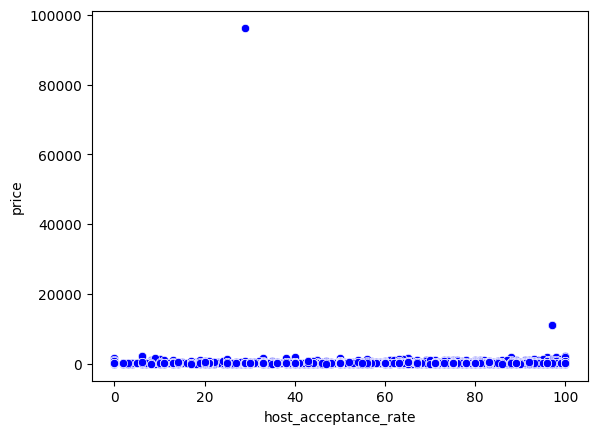

In [17]:
from turtle import color 

#la dependiente es la que intentas predecir 

sns.scatterplot(x='host_acceptance_rate', y='price', color="blue", data=df)
#sns.scatterplot(x='speeding', y='total', color="red", data=df)

In [18]:
#Declaramos las variables dependientes e independedientes para la regresión lineal
Vars_Indep = df[['host_acceptance_rate']] #Los corchetes morados marcan una lista, simple o multiple (en las independientes)
Vars_Dep = df['price']

In [19]:
#Se define model como la función de regresión lineal
from sklearn.linear_model import LinearRegression
model = LinearRegression()

In [20]:
#Veerficamos la finción relacionada al modelo
type (model)

sklearn.linear_model._base.LinearRegression

In [ ]:
#Ajustamos el modelo con las variables antes declaradas
model.fit(X=Vars_Indep, y=Vars_Dep)

LinearRegression()

In [22]:
#Verficamos los coeficientes obtenidos para el modelo ajuystadp 
model.__dict__

{'fit_intercept': True,
 'copy_X': True,
 'n_jobs': None,
 'positive': False,
 'feature_names_in_': array(['host_acceptance_rate'], dtype=object),
 'n_features_in_': 1,
 'coef_': array([0.3656357]),
 'rank_': 1,
 'singular_': array([2537.0784902]),
 'intercept_': 283.4217818460514}

In [ ]:
model.score(Vars_Indep,Vars_Dep)

8.730849954385889e-05

In [24]:
#Predecimos los valores de total de accidentes a partir de la variable 'alcohol'
y_pred = model.predict(X=df[['host_acceptance_rate']])
y_pred

array([285.61559606, 319.61971639, 317.06026647, ..., 319.98535209,
       319.98535209, 319.98535209])

In [25]:
#Insertamos la columna de predicciones en el Dataframe
df.insert(0,'Predicciones', y_pred)
df

Predicciones            id  \
0       285.615596  9.794500e+04   
1       319.619716  1.146950e+05   
2       317.060266  1.273830e+05   
3       311.941367  1.596340e+05   
4       319.619716  1.895510e+05   
...            ...           ...   
5326    315.963359  1.252060e+18   
5327    319.985352  1.252060e+18   
5328    319.985352  1.252170e+18   
5329    319.985352  1.252200e+18   
5330    319.985352  1.252240e+18   

                                           listing_url  host_since  \
0                   https://www.airbnb.com/rooms/97945  18/04/2011   
1                  https://www.airbnb.com/rooms/114695  12/05/2011   
2                  https://www.airbnb.com/rooms/127383  26/05/2011   
3                  https://www.airbnb.com/rooms/159634  01/07/2011   
4                  https://www.airbnb.com/rooms/189551  03/08/2011   
...                                                ...         ...   
5326  https://www.airbnb.com/rooms/1252057653491311158  29/07/2015   
5327  https://www.airbnb.com/rooms/1252064707297002188  23/09/2024   
5328  https://www.airbnb.com/rooms/1252167796711587864  20/05/2015   
5329  https://www.airbnb.com/rooms/1252204445878776998  05/07/2013   
5330  https://www.airbnb.com/rooms/1252243902096578406  23/09/2024   

                host_response_time host_response_rate  host_acceptance_rate  \
0               a few days or more                 0%                   6.0   
1                   within an hour               100%                  99.0   
2                   within an hour               100%                  92.0   
3                   within an hour               100%                  78.0   
4                   within an hour               100%                  99.0   
...                            ...                ...                   ...   
5326  Estado de manera desconocida                 0%                  89.0   
5327  Estado de manera desconocida                 0%                 100.0   
5328  Estado de manera desconocida               100%                 100.0   
5329  Estado de manera desconocida               100%                 100.0   
5330  Estado de manera desconocida               100%                 100.0   

     host_is_superhost                host_verifications  \
0                    f                ['email', 'phone']   
1                    t                ['email', 'phone']   
2                    f  ['email', 'phone', 'work_email']   
3                    f                ['email', 'phone']   
4                    t                         ['phone']   
...                ...                               ...   
5326                 f  ['email', 'phone', 'work_email']   
5327                 f                ['email', 'phone']   
5328                 f  ['email', 'phone', 'work_email']   
5329                 f                ['email', 'phone']   
5330                 f                ['email', 'phone']   

            neighbourhood_cleansed  ... review_scores_cleanliness  \
0                           Hadern  ...                      4.81   
1                     Berg am Laim  ...                      4.95   
2                      Maxvorstadt  ...                      4.81   
3               Pasing-Obermenzing  ...                      4.27   
4                 Schwanthalerhöhe  ...                      4.76   
...                            ...  ...                       ...   
5326  Ludwigsvorstadt-Isarvorstadt  ...                      5.00   
5327         Milbertshofen-Am Hart  ...                      5.00   
5328                 Au-Haidhausen  ...                      5.00   
5329                   Maxvorstadt  ...                      5.00   
5330         Milbertshofen-Am Hart  ...                      5.00   

     review_scores_checkin review_scores_communication review_scores_location  \
0                     4.90                        4.93                   4.78   
1                     4.97                        5.00                 

<Axes: xlabel='host_acceptance_rate', ylabel='price'>

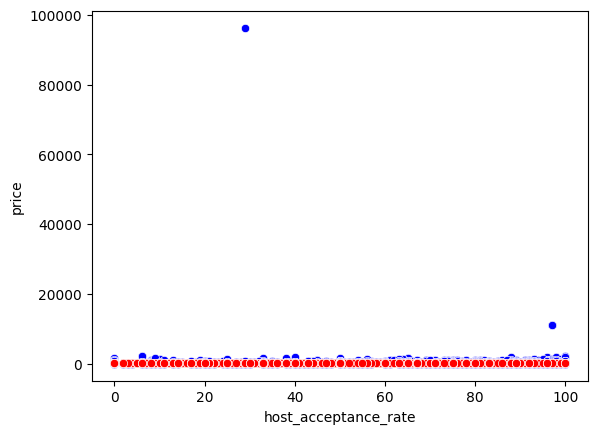

In [26]:
#Visualizamos la gráfica comparativa etre el total real y el total predecido 
sns.scatterplot(x='host_acceptance_rate', y='price', color="blue", data=df)
sns.scatterplot(x='host_acceptance_rate', y='Predicciones', color="red", data=df)

In [27]:
#Corroboramos cual es el coeficiente de Determinación de nuestro modelo
coef_Deter = model.score(X=Vars_Indep, y=Vars_Dep)
coef_Deter

8.730849954385889e-05

In [28]:
#Corroboramos cual es el coeficiente de Determinación de nuestro modelo
coef_Correl = np.sqrt(coef_Deter)
coef_Correl

0.009343901730212004

**Price vs host_is_superhost**

In [29]:
# Convertir los valores 'True' y 'False' a valores booleanos y luego a numéricos
df['host_is_superhost'] = df['host_is_superhost'].map({'t': True, 'f': False, 'Sin identificar': False}).astype(int)

<Axes: xlabel='host_is_superhost', ylabel='price'>

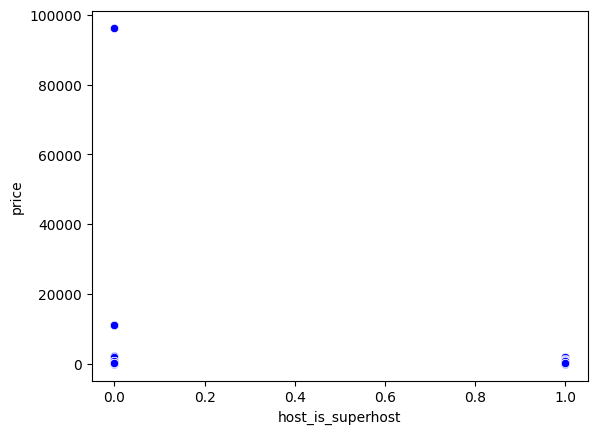

In [30]:
from turtle import color 
#la dependiente es la que intentas predecir 
sns.scatterplot(x='host_is_superhost', y='price', color="blue", data=df)

In [31]:
#Declaramos las variables dependientes e independedientes para la regresión lineal
Vars_Indep1 = df[['host_is_superhost']] #Los corchetes morados marcan una lista, simple o multiple (en las independientes)
Vars_Dep1 = df['price']

In [32]:
#Se define model como la función de regresión lineal
from sklearn.linear_model import LinearRegression
model1 = LinearRegression()

In [33]:
#Veerficamos la finción relacionada al modelo
type (model1)

sklearn.linear_model._base.LinearRegression

In [34]:
#Ajustamos el modelo con las variables antes declaradas
model1.fit(X=Vars_Indep1, y=Vars_Dep1)

LinearRegression()

In [35]:
#Verficamos los coeficientes obtenidos para el modelo ajuystadp 
model1.__dict__

{'fit_intercept': True,
 'copy_X': True,
 'n_jobs': None,
 'positive': False,
 'feature_names_in_': array(['host_is_superhost'], dtype=object),
 'n_features_in_': 1,
 'coef_': array([1.15076857]),
 'rank_': 1,
 'singular_': array([24.67431832]),
 'intercept_': 308.10172786177105}

In [36]:
model1.score(Vars_Indep1,Vars_Dep1)

8.180085364628553e-08

In [37]:
#Predecimos los valores de total de accidentes a partir de la variable 'alcohol'
y_pred1 = model1.predict(X=df[['host_is_superhost']])
y_pred1

array([308.10172786, 309.25249643, 308.10172786, ..., 308.10172786,
       308.10172786, 308.10172786])

In [38]:
#Insertamos la columna de predicciones en el Dataframe
df.insert(0,'Predicciones1', y_pred1)
df

Predicciones1  Predicciones            id  \
0        308.101728    285.615596  9.794500e+04   
1        309.252496    319.619716  1.146950e+05   
2        308.101728    317.060266  1.273830e+05   
3        308.101728    311.941367  1.596340e+05   
4        309.252496    319.619716  1.895510e+05   
...             ...           ...           ...   
5326     308.101728    315.963359  1.252060e+18   
5327     308.101728    319.985352  1.252060e+18   
5328     308.101728    319.985352  1.252170e+18   
5329     308.101728    319.985352  1.252200e+18   
5330     308.101728    319.985352  1.252240e+18   

                                           listing_url  host_since  \
0                   https://www.airbnb.com/rooms/97945  18/04/2011   
1                  https://www.airbnb.com/rooms/114695  12/05/2011   
2                  https://www.airbnb.com/rooms/127383  26/05/2011   
3                  https://www.airbnb.com/rooms/159634  01/07/2011   
4                  https://www.airbnb.com/rooms/189551  03/08/2011   
...                                                ...         ...   
5326  https://www.airbnb.com/rooms/1252057653491311158  29/07/2015   
5327  https://www.airbnb.com/rooms/1252064707297002188  23/09/2024   
5328  https://www.airbnb.com/rooms/1252167796711587864  20/05/2015   
5329  https://www.airbnb.com/rooms/1252204445878776998  05/07/2013   
5330  https://www.airbnb.com/rooms/1252243902096578406  23/09/2024   

                host_response_time host_response_rate  host_acceptance_rate  \
0               a few days or more                 0%                   6.0   
1                   within an hour               100%                  99.0   
2                   within an hour               100%                  92.0   
3                   within an hour               100%                  78.0   
4                   within an hour               100%                  99.0   
...                            ...                ...                   ...   
5326  Estado de manera desconocida                 0%                  89.0   
5327  Estado de manera desconocida                 0%                 100.0   
5328  Estado de manera desconocida               100%                 100.0   
5329  Estado de manera desconocida               100%                 100.0   
5330  Estado de manera desconocida               100%                 100.0   

      host_is_superhost                host_verifications  ...  \
0                     0                ['email', 'phone']  ...   
1                     1                ['email', 'phone']  ...   
2                     0  ['email', 'phone', 'work_email']  ...   
3                     0                ['email', 'phone']  ...   
4                     1                         ['phone']  ...   
...                 ...                               ...  ...   
5326                  0  ['email', 'phone', 'work_email']  ...   
5327                  0                ['email', 'phone']  ...   
5328                  0  ['email', 'phone', 'work_email']  ...   
5329                  0                ['email', 'phone']  ...   
5330                  0                ['email', 'phone']  ...   

     review_scores_cleanliness review_scores_checkin  \
0                         4.81                  4.90   
1                         4.95                  4.97   
2                         4.81                  4.98   
3                         4.27                  4.78   
4                         4.76                  4.88   
...                        ...                   ...   
5326                      5.00                  4.80   
5327                      5.00                  4.80   
5328                      5.00                  4.80   
5329                      5.00                  4.80   
5330                      5.00                  4.80   

     review_scores_communication review_scores_location review_scores_value  \
0                           4.93                   4.78   

<Axes: xlabel='host_is_superhost', ylabel='price'>

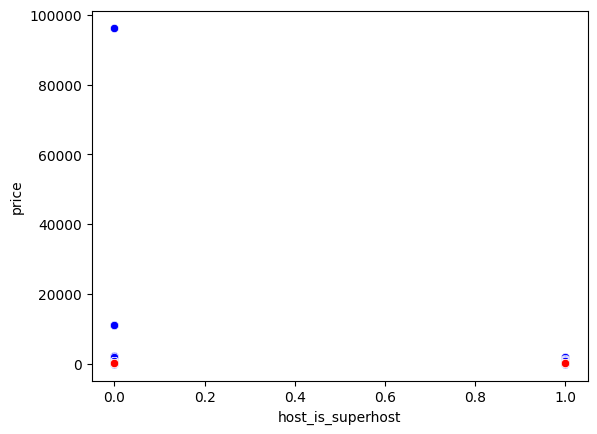

In [39]:
#Visualizamos la gráfica comparativa etre el total real y el total predecido 
sns.scatterplot(x='host_is_superhost', y='price', color="blue", data=df)
sns.scatterplot(x='host_is_superhost', y='Predicciones1', color="red", data=df)

In [40]:
#Corroboramos cual es el coeficiente de Determinación de nuestro modelo
coef_Deter1 = model1.score(X=Vars_Indep1, y=Vars_Dep1)
coef_Deter1

8.180085364628553e-08

In [41]:
#Corroboramos cual es el coeficiente de Determinación de nuestro modelo
coef_Correl1 = np.sqrt(coef_Deter1)
coef_Correl1

0.0002860084852697303

**bathrooms vs accommodates**

<Axes: xlabel='bathrooms', ylabel='accommodates'>

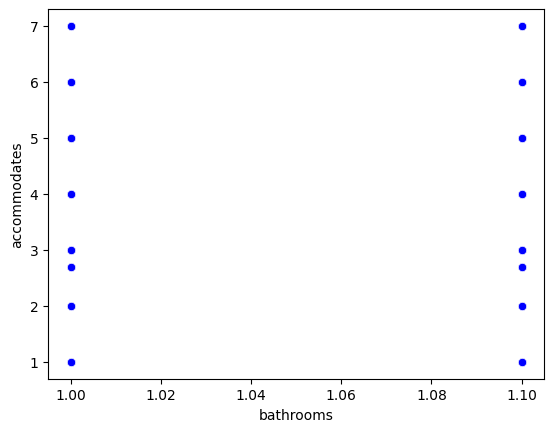

In [42]:
from turtle import color 
#la dependiente es la que intentas predecir 
sns.scatterplot(x='bathrooms', y='accommodates', color="blue", data=df)

In [43]:
#Declaramos las variables dependientes e independedientes para la regresión lineal
Vars_Indep2 = df[['bathrooms']] #Los corchetes morados marcan una lista, simple o multiple (en las independientes)
Vars_Dep2 = df['accommodates']

In [44]:
#Se define model como la función de regresión lineal
from sklearn.linear_model import LinearRegression
model2 = LinearRegression()

In [45]:
#Veerficamos la finción relacionada al modelo
type (model2)

sklearn.linear_model._base.LinearRegression

In [46]:
#Ajustamos el modelo con las variables antes declaradas
model2.fit(X=Vars_Indep2, y=Vars_Dep2)

LinearRegression()

In [47]:
#Verficamos los coeficientes obtenidos para el modelo ajuystadp 
model2.__dict__

{'fit_intercept': True,
 'copy_X': True,
 'n_jobs': None,
 'positive': False,
 'feature_names_in_': array(['bathrooms'], dtype=object),
 'n_features_in_': 1,
 'coef_': array([4.0063074]),
 'rank_': 1,
 'singular_': array([3.57139945]),
 'intercept_': -1.1970469881172825}

In [48]:
model2.score(Vars_Indep2,Vars_Dep2)

0.023139928627768147

In [49]:
#Predecimos los valores de total de accidentes a partir de la variable 'alcohol'
y_pred2 = model2.predict(X=df[['bathrooms']])
y_pred2

array([2.80926041, 2.80926041, 3.20989115, ..., 2.80926041, 2.80926041,
       2.80926041])

In [50]:
#Insertamos la columna de predicciones en el Dataframe
df.insert(0,'Predicciones2', y_pred2)
df

Predicciones2  Predicciones1  Predicciones            id  \
0          2.809260     308.101728    285.615596  9.794500e+04   
1          2.809260     309.252496    319.619716  1.146950e+05   
2          3.209891     308.101728    317.060266  1.273830e+05   
3          2.809260     308.101728    311.941367  1.596340e+05   
4          3.209891     309.252496    319.619716  1.895510e+05   
...             ...            ...           ...           ...   
5326       2.809260     308.101728    315.963359  1.252060e+18   
5327       2.809260     308.101728    319.985352  1.252060e+18   
5328       2.809260     308.101728    319.985352  1.252170e+18   
5329       2.809260     308.101728    319.985352  1.252200e+18   
5330       2.809260     308.101728    319.985352  1.252240e+18   

                                           listing_url  host_since  \
0                   https://www.airbnb.com/rooms/97945  18/04/2011   
1                  https://www.airbnb.com/rooms/114695  12/05/2011   
2                  https://www.airbnb.com/rooms/127383  26/05/2011   
3                  https://www.airbnb.com/rooms/159634  01/07/2011   
4                  https://www.airbnb.com/rooms/189551  03/08/2011   
...                                                ...         ...   
5326  https://www.airbnb.com/rooms/1252057653491311158  29/07/2015   
5327  https://www.airbnb.com/rooms/1252064707297002188  23/09/2024   
5328  https://www.airbnb.com/rooms/1252167796711587864  20/05/2015   
5329  https://www.airbnb.com/rooms/1252204445878776998  05/07/2013   
5330  https://www.airbnb.com/rooms/1252243902096578406  23/09/2024   

                host_response_time host_response_rate  host_acceptance_rate  \
0               a few days or more                 0%                   6.0   
1                   within an hour               100%                  99.0   
2                   within an hour               100%                  92.0   
3                   within an hour               100%                  78.0   
4                   within an hour               100%                  99.0   
...                            ...                ...                   ...   
5326  Estado de manera desconocida                 0%                  89.0   
5327  Estado de manera desconocida                 0%                 100.0   
5328  Estado de manera desconocida               100%                 100.0   
5329  Estado de manera desconocida               100%                 100.0   
5330  Estado de manera desconocida               100%                 100.0   

      host_is_superhost  ... review_scores_cleanliness review_scores_checkin  \
0                     0  ...                      4.81                  4.90   
1                     1  ...                      4.95                  4.97   
2                     0  ...                      4.81                  4.98   
3                     0  ...                      4.27                  4.78   
4                     1  ...                      4.76                  4.88   
...                 ...  ...                       ...                   ...   
5326                  0  ...                      5.00                  4.80   
5327                  0  ...                      5.00                  4.80   
5328                  0  ...                      5.00                  4.80   
5329                  0  ...                      5.00                  4.80   
5330                  0  ...                      5.00                  4.80   

     review_scores_communication review_scores_location review_scores_value  \
0                           4.93                   4.78                4.73   
1                           5.00                   4.66                4.61   
2                           4.96                   4.91                4.81   
3                           4.80                   4.59                4.44   
4                           4.89                   4.85            

<Axes: xlabel='bathrooms', ylabel='accommodates'>

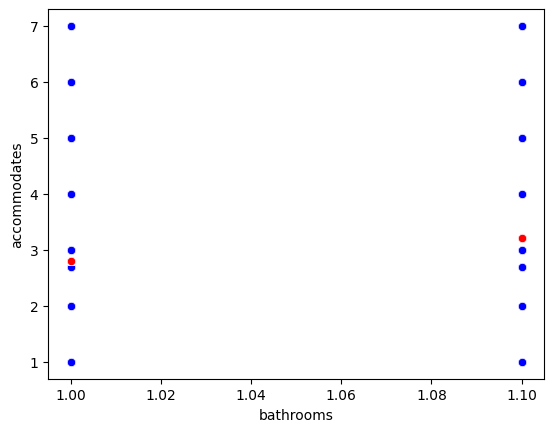

In [51]:
#Visualizamos la gráfica comparativa etre el total real y el total predecido 
sns.scatterplot(x='bathrooms', y='accommodates', color="blue", data=df)
sns.scatterplot(x='bathrooms', y='Predicciones2', color="red", data=df)

In [52]:
#Corroboramos cual es el coeficiente de Determinación de nuestro modelo
coef_Deter2 = model2.score(X=Vars_Indep2, y=Vars_Dep2)
coef_Deter2

0.023139928627768147

In [53]:
#Corroboramos cual es el coeficiente de Determinación de nuestro modelo
coef_Correl2 = np.sqrt(coef_Deter2)
coef_Correl2

0.15211814036389001

**Price vs review_scores_cleanliness**

<Axes: xlabel='review_scores_cleanliness', ylabel='price'>

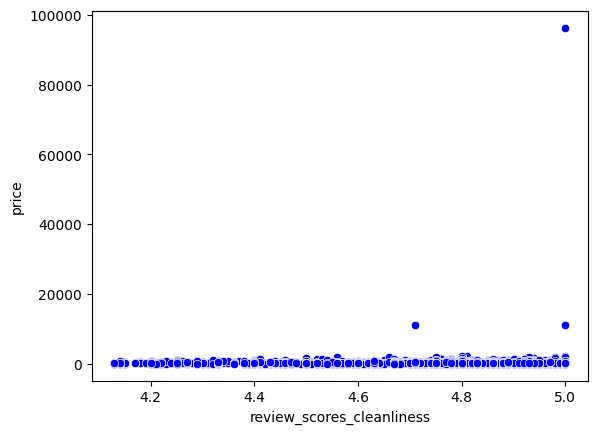

In [54]:
from turtle import color 
#la dependiente es la que intentas predecir 
sns.scatterplot(x='review_scores_cleanliness', y='price', color="blue", data=df)

In [55]:
#Declaramos las variables dependientes e independedientes para la regresión lineal
Vars_Indep3 = df[['review_scores_cleanliness']] #Los corchetes morados marcan una lista, simple o multiple (en las independientes)
Vars_Dep3 = df['price']

In [56]:
#Se define model como la función de regresión lineal
from sklearn.linear_model import LinearRegression
model3 = LinearRegression()

In [57]:
#Veerficamos la finción relacionada al modelo
type (model3)

sklearn.linear_model._base.LinearRegression

In [58]:
#Ajustamos el modelo con las variables antes declaradas
model3.fit(X=Vars_Indep3, y=Vars_Dep3)

LinearRegression()

In [59]:
#Verficamos los coeficientes obtenidos para el modelo ajuystadp 
model3.__dict__

{'fit_intercept': True,
 'copy_X': True,
 'n_jobs': None,
 'positive': False,
 'feature_names_in_': array(['review_scores_cleanliness'], dtype=object),
 'n_features_in_': 1,
 'coef_': array([96.91553185]),
 'rank_': 1,
 'singular_': array([15.01889151]),
 'intercept_': -159.7853419488589}

In [60]:
model3.score(Vars_Indep3,Vars_Dep3)

0.0002149582181774079

In [61]:
#Predecimos los valores de total de accidentes a partir de la variable 'alcohol'
y_pred3 = model3.predict(X=df[['review_scores_cleanliness']])
y_pred3

array([306.37836623, 319.94654069, 306.37836623, ..., 324.79231728,
       324.79231728, 324.79231728])

In [62]:
#Insertamos la columna de predicciones en el Dataframe
df.insert(0,'Predicciones3', y_pred3)
df

Predicciones3  Predicciones2  Predicciones1  Predicciones            id  \
0        306.378366       2.809260     308.101728    285.615596  9.794500e+04   
1        319.946541       2.809260     309.252496    319.619716  1.146950e+05   
2        306.378366       3.209891     308.101728    317.060266  1.273830e+05   
3        254.043979       2.809260     308.101728    311.941367  1.596340e+05   
4        301.532590       3.209891     309.252496    319.619716  1.895510e+05   
...             ...            ...            ...           ...           ...   
5326     324.792317       2.809260     308.101728    315.963359  1.252060e+18   
5327     324.792317       2.809260     308.101728    319.985352  1.252060e+18   
5328     324.792317       2.809260     308.101728    319.985352  1.252170e+18   
5329     324.792317       2.809260     308.101728    319.985352  1.252200e+18   
5330     324.792317       2.809260     308.101728    319.985352  1.252240e+18   

                                           listing_url  host_since  \
0                   https://www.airbnb.com/rooms/97945  18/04/2011   
1                  https://www.airbnb.com/rooms/114695  12/05/2011   
2                  https://www.airbnb.com/rooms/127383  26/05/2011   
3                  https://www.airbnb.com/rooms/159634  01/07/2011   
4                  https://www.airbnb.com/rooms/189551  03/08/2011   
...                                                ...         ...   
5326  https://www.airbnb.com/rooms/1252057653491311158  29/07/2015   
5327  https://www.airbnb.com/rooms/1252064707297002188  23/09/2024   
5328  https://www.airbnb.com/rooms/1252167796711587864  20/05/2015   
5329  https://www.airbnb.com/rooms/1252204445878776998  05/07/2013   
5330  https://www.airbnb.com/rooms/1252243902096578406  23/09/2024   

                host_response_time host_response_rate  host_acceptance_rate  \
0               a few days or more                 0%                   6.0   
1                   within an hour               100%                  99.0   
2                   within an hour               100%                  92.0   
3                   within an hour               100%                  78.0   
4                   within an hour               100%                  99.0   
...                            ...                ...                   ...   
5326  Estado de manera desconocida                 0%                  89.0   
5327  Estado de manera desconocida                 0%                 100.0   
5328  Estado de manera desconocida               100%                 100.0   
5329  Estado de manera desconocida               100%                 100.0   
5330  Estado de manera desconocida               100%                 100.0   

      ...  review_scores_cleanliness review_scores_checkin  \
0     ...                       4.81                  4.90   
1     ...                       4.95                  4.97   
2     ...                       4.81                  4.98   
3     ...                       4.27                  4.78   
4     ...                       4.76                  4.88   
...   ...                        ...                   ...   
5326  ...                       5.00                  4.80   
5327  ...                       5.00                  4.80   
5328  ...                       5.00                  4.80   
5329  ...                       5.00                  4.80   
5330  ...                       5.00                  4.80   

     review_scores_communication review_scores_location review_scores_value  \
0                           4.93                   4.78                4.73   
1                           5.00                   4.66                4.61   
2                           4.96                   4.91                4.81   
3                           4.80                   4.59                4.44   
4                           4.89                   4.85                4.68   
...                     

<Axes: xlabel='review_scores_cleanliness', ylabel='price'>

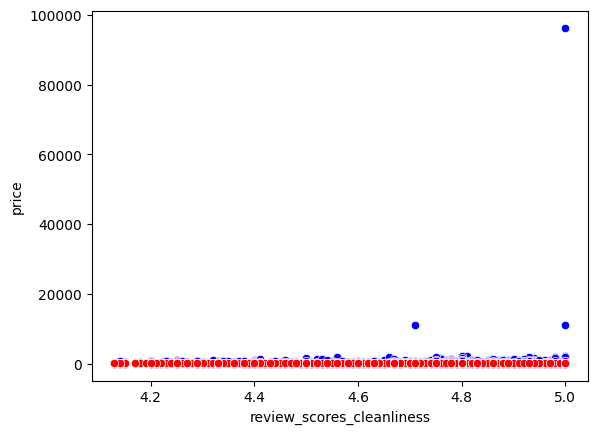

In [63]:
#Visualizamos la gráfica comparativa etre el total real y el total predecido 
sns.scatterplot(x='review_scores_cleanliness', y='price', color="blue", data=df)
sns.scatterplot(x='review_scores_cleanliness', y='Predicciones3', color="red", data=df)

In [64]:
#Corroboramos cual es el coeficiente de Determinación de nuestro modelo
coef_Deter3 = model3.score(X=Vars_Indep3, y=Vars_Dep3)
coef_Deter3

0.0002149582181774079

In [65]:
#Corroboramos cual es el coeficiente de Determinación de nuestro modelo
coef_Correl3 = np.sqrt(coef_Deter3)
coef_Correl3

0.014661453481064143

**price vs instant_bookable**

In [67]:
# Convertir los valores 'True' y 'False' a valores booleanos y luego a numéricos
df['instant_bookable'] = df['instant_bookable'].map({'t': True, 'f': False}).astype(int)

<Axes: xlabel='instant_bookable', ylabel='price'>

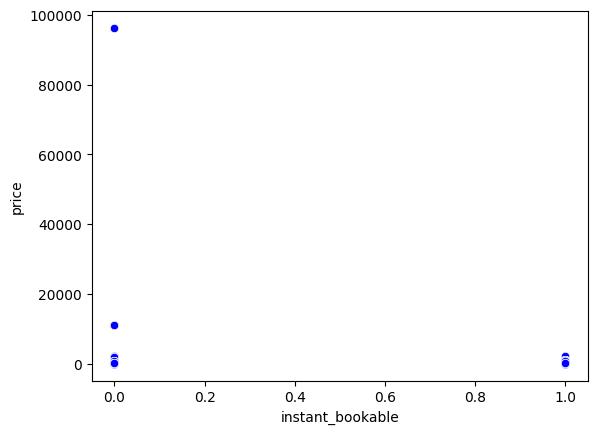

In [68]:
from turtle import color 
#la dependiente es la que intentas predecir 
sns.scatterplot(x='instant_bookable', y='price', color="blue", data=df)

In [69]:
#Declaramos las variables dependientes e independedientes para la regresión lineal
Vars_Indep5 = df[['instant_bookable']] #Los corchetes morados marcan una lista, simple o multiple (en las independientes)
Vars_Dep5 = df['price']

In [70]:
#Se define model como la función de regresión lineal
from sklearn.linear_model import LinearRegression
model5 = LinearRegression()

In [71]:
#Veerficamos la finción relacionada al modelo
type (model5)

sklearn.linear_model._base.LinearRegression

In [72]:
#Ajustamos el modelo con las variables antes declaradas
model5.fit(X=Vars_Indep5, y=Vars_Dep5)

LinearRegression()

In [73]:
#Verficamos los coeficientes obtenidos para el modelo ajuystadp 
model5.__dict__

{'fit_intercept': True,
 'copy_X': True,
 'n_jobs': None,
 'positive': False,
 'feature_names_in_': array(['instant_bookable'], dtype=object),
 'n_features_in_': 1,
 'coef_': array([65.8281373]),
 'rank_': 1,
 'singular_': array([27.55475101]),
 'intercept_': 296.92976891708224}

In [74]:
model5.score(Vars_Indep5,Vars_Dep5)

0.0003338163783759285

In [75]:
#Predecimos los valores de total de accidentes a partir de la variable 'alcohol'
y_pred5 = model5.predict(X=df[['instant_bookable']])
y_pred5

array([296.92976892, 296.92976892, 296.92976892, ..., 296.92976892,
       296.92976892, 296.92976892])

In [76]:
#Insertamos la columna de predicciones en el Dataframe
df.insert(0,'Predicciones5', y_pred5)
df

Predicciones5  Predicciones3  Predicciones2  Predicciones1  \
0        296.929769     306.378366       2.809260     308.101728   
1        296.929769     319.946541       2.809260     309.252496   
2        296.929769     306.378366       3.209891     308.101728   
3        362.757906     254.043979       2.809260     308.101728   
4        362.757906     301.532590       3.209891     309.252496   
...             ...            ...            ...            ...   
5326     296.929769     324.792317       2.809260     308.101728   
5327     296.929769     324.792317       2.809260     308.101728   
5328     296.929769     324.792317       2.809260     308.101728   
5329     296.929769     324.792317       2.809260     308.101728   
5330     296.929769     324.792317       2.809260     308.101728   

      Predicciones            id  \
0       285.615596  9.794500e+04   
1       319.619716  1.146950e+05   
2       317.060266  1.273830e+05   
3       311.941367  1.596340e+05   
4       319.619716  1.895510e+05   
...            ...           ...   
5326    315.963359  1.252060e+18   
5327    319.985352  1.252060e+18   
5328    319.985352  1.252170e+18   
5329    319.985352  1.252200e+18   
5330    319.985352  1.252240e+18   

                                           listing_url  host_since  \
0                   https://www.airbnb.com/rooms/97945  18/04/2011   
1                  https://www.airbnb.com/rooms/114695  12/05/2011   
2                  https://www.airbnb.com/rooms/127383  26/05/2011   
3                  https://www.airbnb.com/rooms/159634  01/07/2011   
4                  https://www.airbnb.com/rooms/189551  03/08/2011   
...                                                ...         ...   
5326  https://www.airbnb.com/rooms/1252057653491311158  29/07/2015   
5327  https://www.airbnb.com/rooms/1252064707297002188  23/09/2024   
5328  https://www.airbnb.com/rooms/1252167796711587864  20/05/2015   
5329  https://www.airbnb.com/rooms/1252204445878776998  05/07/2013   
5330  https://www.airbnb.com/rooms/1252243902096578406  23/09/2024   

                host_response_time host_response_rate  ...  \
0               a few days or more                 0%  ...   
1                   within an hour               100%  ...   
2                   within an hour               100%  ...   
3                   within an hour               100%  ...   
4                   within an hour               100%  ...   
...                            ...                ...  ...   
5326  Estado de manera desconocida                 0%  ...   
5327  Estado de manera desconocida                 0%  ...   
5328  Estado de manera desconocida               100%  ...   
5329  Estado de manera desconocida               100%  ...   
5330  Estado de manera desconocida               100%  ...   

      review_scores_cleanliness  review_scores_checkin  \
0                          4.81                   4.90   
1                          4.95                   4.97   
2                          4.81                   4.98   
3                          4.27                   4.78   
4                          4.76                   4.88   
...                         ...                    ...   
5326                       5.00                   4.80   
5327                       5.00                   4.80   
5328                       5.00                   4.80   
5329                       5.00                   4.80   
5330                       5.00                   4.80   

     review_scores_communication review_scores_location review_scores_value  \
0                           4.93                   4.78                4.73   
1                           5.00                   4.66                4.61   
2                           4.96                   4.91                4.81   
3                           4.80                   4.59                4.44   
4                           4.89                   4.85                4.68   

<Axes: xlabel='instant_bookable', ylabel='price'>

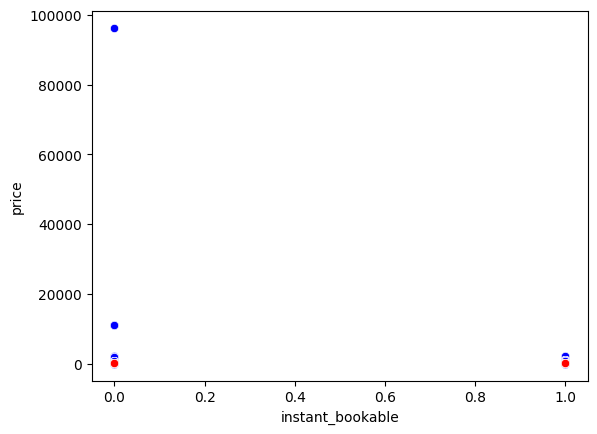

In [77]:
#Visualizamos la gráfica comparativa etre el total real y el total predecido 
sns.scatterplot(x='instant_bookable', y='price', color="blue", data=df)
sns.scatterplot(x='instant_bookable', y='Predicciones5', color="red", data=df)

In [78]:
#Corroboramos cual es el coeficiente de Determinación de nuestro modelo
coef_Deter5 = model5.score(X=Vars_Indep5, y=Vars_Dep5)
coef_Deter5

0.0003338163783759285

In [79]:
#Corroboramos cual es el coeficiente de Determinación de nuestro modelo
coef_Correl5 = np.sqrt(coef_Deter5)
coef_Correl5

0.018270642527725412

**price vs property_type**

In [80]:
tipos_habitacion = df['property_type'].unique()
tipos_habitacion

array(['Entire rental unit', 'Entire loft', 'Entire townhouse',
       'Entire condo', 'Entire home', 'Room in aparthotel', 'Camper/RV',
       'Entire serviced apartment', 'Entire guesthouse',
       'Entire home/apt', 'Entire bungalow', 'Entire guest suite',
       'Entire villa', 'Tiny home', 'Hut', 'Entire place', 'Pension',
       'Entire vacation home', 'Entire chalet', 'Entire cabin',
       'Shepherd’s hut', 'Shipping container', 'Tent'], dtype=object)

In [81]:
# Mapeo de cada tipo de habitación a un número
tipo_a_numero = {
    'Entire rental unit': 1,
    'Entire loft': 2,
    'Entire townhouse': 3,
    'Entire condo': 4,
    'Entire home': 5,
    'Room in aparthotel': 6,
    'Camper/RV': 7,
    'Entire serviced apartment': 8,
    'Entire guesthouse': 9,
    'Entire home/apt': 10,
    'Entire bungalow': 11,
    'Entire guest suite': 12,
    'Entire villa': 13,
    'Tiny home': 14,
    'Hut': 15,
    'Entire place': 16,
    'Pension': 17,
    'Entire vacation home': 18,
    'Entire chalet': 19,
    'Entire cabin': 20,
    'Shepherd’s hut': 21,
    'Shipping container': 22,
    'Tent': 23
}

# Aplicación del mapeo a la columna 'property_type'
df['property_type_numerico'] = df['property_type'].map(tipo_a_numero)

<Axes: xlabel='property_type_numerico', ylabel='price'>

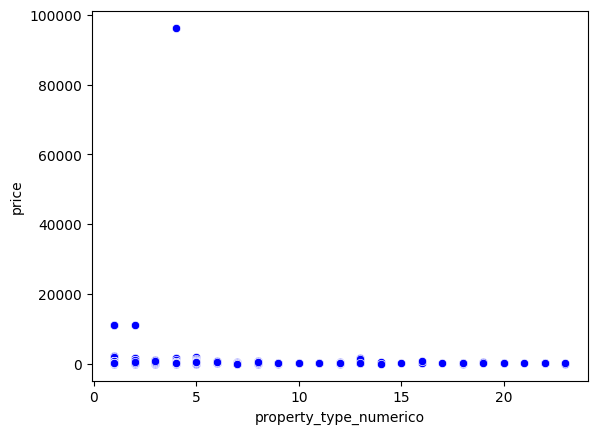

In [82]:
from turtle import color 
#la dependiente es la que intentas predecir 
sns.scatterplot(x='property_type_numerico', y='price', color="blue", data=df)

In [83]:
#Declaramos las variables dependientes e independedientes para la regresión lineal
Vars_Indep6 = df[['property_type_numerico']] #Los corchetes morados marcan una lista, simple o multiple (en las independientes)
Vars_Dep6 = df['price']

In [84]:
#Se define model como la función de regresión lineal
from sklearn.linear_model import LinearRegression
model6 = LinearRegression()

In [85]:
#Veerficamos la finción relacionada al modelo
type (model6)

sklearn.linear_model._base.LinearRegression

In [86]:
#Ajustamos el modelo con las variables antes declaradas
model6.fit(X=Vars_Indep6, y=Vars_Dep6)

LinearRegression()

In [87]:
#Verficamos los coeficientes obtenidos para el modelo ajuystadp 
model6.__dict__

{'fit_intercept': True,
 'copy_X': True,
 'n_jobs': None,
 'positive': False,
 'feature_names_in_': array(['property_type_numerico'], dtype=object),
 'n_features_in_': 1,
 'coef_': array([14.50794555]),
 'rank_': 1,
 'singular_': array([154.62419816]),
 'intercept_': 282.61717368246883}

In [88]:
model6.score(Vars_Indep6,Vars_Dep6)

0.0005105735134875999

In [89]:
#Predecimos los valores de total de accidentes a partir de la variable 'alcohol'
y_pred6 = model6.predict(X=df[['property_type_numerico']])
y_pred6

array([297.12511923, 297.12511923, 297.12511923, ..., 297.12511923,
       297.12511923, 297.12511923])

In [ ]:
#Insertamos la columna de predicciones en el Dataframe
df.insert(0,'Predicciones6', y_pred6)


In [92]:
df

Predicciones6  Predicciones5  Predicciones3  Predicciones2  \
0        297.125119     296.929769     306.378366       2.809260   
1        297.125119     296.929769     319.946541       2.809260   
2        297.125119     296.929769     306.378366       3.209891   
3        297.125119     362.757906     254.043979       2.809260   
4        311.633065     362.757906     301.532590       3.209891   
...             ...            ...            ...            ...   
5326     297.125119     296.929769     324.792317       2.809260   
5327     297.125119     296.929769     324.792317       2.809260   
5328     297.125119     296.929769     324.792317       2.809260   
5329     297.125119     296.929769     324.792317       2.809260   
5330     297.125119     296.929769     324.792317       2.809260   

      Predicciones1  Predicciones            id  \
0        308.101728    285.615596  9.794500e+04   
1        309.252496    319.619716  1.146950e+05   
2        308.101728    317.060266  1.273830e+05   
3        308.101728    311.941367  1.596340e+05   
4        309.252496    319.619716  1.895510e+05   
...             ...           ...           ...   
5326     308.101728    315.963359  1.252060e+18   
5327     308.101728    319.985352  1.252060e+18   
5328     308.101728    319.985352  1.252170e+18   
5329     308.101728    319.985352  1.252200e+18   
5330     308.101728    319.985352  1.252240e+18   

                                           listing_url  host_since  \
0                   https://www.airbnb.com/rooms/97945  18/04/2011   
1                  https://www.airbnb.com/rooms/114695  12/05/2011   
2                  https://www.airbnb.com/rooms/127383  26/05/2011   
3                  https://www.airbnb.com/rooms/159634  01/07/2011   
4                  https://www.airbnb.com/rooms/189551  03/08/2011   
...                                                ...         ...   
5326  https://www.airbnb.com/rooms/1252057653491311158  29/07/2015   
5327  https://www.airbnb.com/rooms/1252064707297002188  23/09/2024   
5328  https://www.airbnb.com/rooms/1252167796711587864  20/05/2015   
5329  https://www.airbnb.com/rooms/1252204445878776998  05/07/2013   
5330  https://www.airbnb.com/rooms/1252243902096578406  23/09/2024   

                host_response_time  ... review_scores_checkin  \
0               a few days or more  ...                  4.90   
1                   within an hour  ...                  4.97   
2                   within an hour  ...                  4.98   
3                   within an hour  ...                  4.78   
4                   within an hour  ...                  4.88   
...                            ...  ...                   ...   
5326  Estado de manera desconocida  ...                  4.80   
5327  Estado de manera desconocida  ...                  4.80   
5328  Estado de manera desconocida  ...                  4.80   
5329  Estado de manera desconocida  ...                  4.80   
5330  Estado de manera desconocida  ...                  4.80   

      review_scores_communication  review_scores_location review_scores_value  \
0                            4.93                    4.78                4.73   
1                            5.00                    4.66                4.61   
2                            4.96                    4.91                4.81   
3                            4.80                    4.59                4.44   
4                            4.89                    4.85                4.68   
...                           ...                     ...                 ...   
5326                         5.00                    4.90                5.00   
5327                         5.00                    4.90                5.00   
5328                         5.00                    4.90                5.00   
5329                         5.00                    4.90                5.00   
5330                         5.00                    4.90      

<Axes: xlabel='property_type_numerico', ylabel='price'>

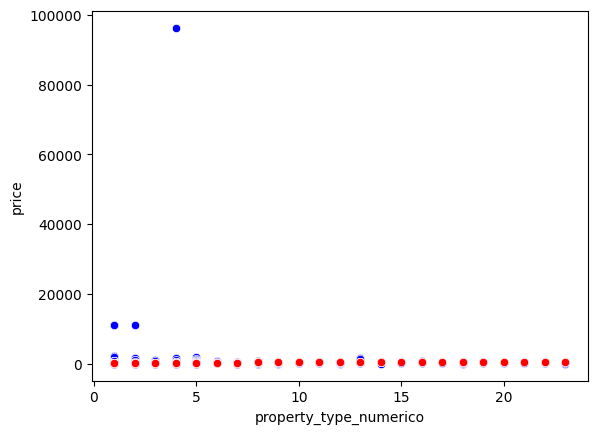

In [93]:
#Visualizamos la gráfica comparativa etre el total real y el total predecido 
sns.scatterplot(x='property_type_numerico', y='price', color="blue", data=df)
sns.scatterplot(x='property_type_numerico', y='Predicciones6', color="red", data=df)

In [94]:
#Corroboramos cual es el coeficiente de Determinación de nuestro modelo
coef_Deter6 = model6.score(X=Vars_Indep6, y=Vars_Dep6)
coef_Deter6

0.0005105735134875999

In [95]:
#Corroboramos cual es el coeficiente de Determinación de nuestro modelo
coef_Correl6 = np.sqrt(coef_Deter6)
coef_Correl6

0.022595873815535437